In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [45]:
x = np.linspace(-10, 10, 10001)
x

array([-10.   ,  -9.998,  -9.996, ...,   9.996,   9.998,  10.   ])

In [13]:
def quadratic(x, a, b, c):  # 변수 x가 먼저 오고, 파라미터가 그 뒤를 따른다.
    return a * x ** 2 + b * x + c

In [22]:
A = np.pi
B = 2
C = 3.5

In [24]:
y = quadratic(x, A, B, C)
y

array([297.65926536, 297.53761422, 297.41598821, ..., 337.39998821,
       337.52961422, 337.65926536])

C:\Users\paulp\AppData\Local\Temp\ipykernel_6472\2147310243.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


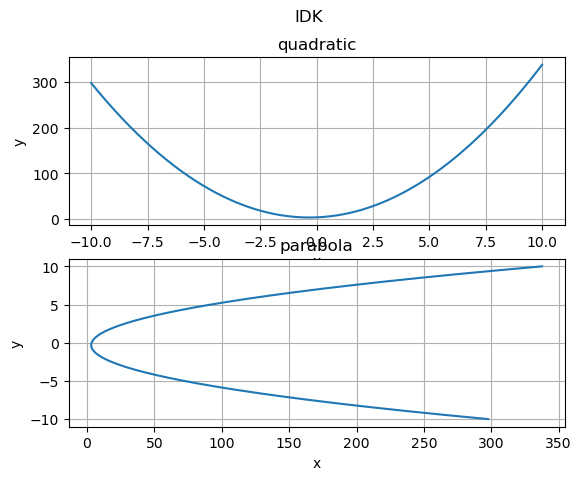

In [34]:
fig, ax = plt.subplots(2)  # figure랑 좌표축 만들기
ax[0].plot(x, y)             # 데이터를 좌표축에 올린다. (그린다)
ax[0].set_title('quadratic') # 제목 설정
ax[0].set_xlabel('x')        # x축의 이름 설정
ax[0].set_ylabel('y')        # y축의 이름 설정
ax[0].grid()                # 그래프에 그리드 키기

ax[1].plot(y, x)             # 데이터를 좌표축에 올린다. (그린다)
ax[1].set_title('parabola')  # 제목 설정
ax[1].set_xlabel('x')        # x축의 이름 설정
ax[1].set_ylabel('y')        # y축의 이름 설정
ax[1].grid()                # 그래프에 그리드 키기

fig.suptitle('IDK')       # figure의 이름 설정
plt.show()

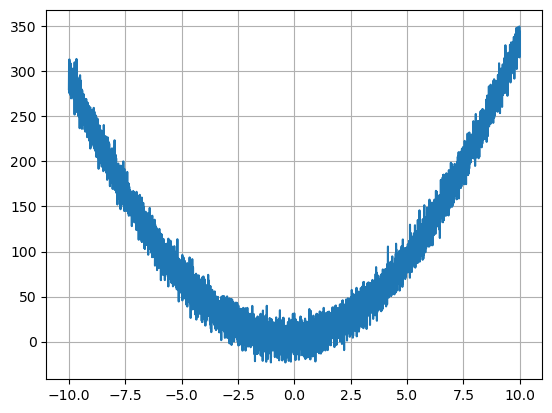

In [40]:
# Make noise
rng = np.random.default_rng()
y_noise = 10 * rng.normal(size=x.size)
noisy = y + y_noise
plt.plot(x, noisy)
plt.grid()

In [47]:
params, covars = curve_fit(quadratic, x, noisy)  # elements have same order as parameter in function
print(params)
print(covars)
fitting_result = quadratic(x, *params)

[3.13709    2.02520596 3.77208265]
[[ 1.13587989e-05  4.39126695e-13 -3.78702356e-04]
 [ 4.39126695e-13  3.02961829e-04 -2.59067586e-11]
 [-3.78702356e-04 -2.59067586e-11  2.27266831e-02]]


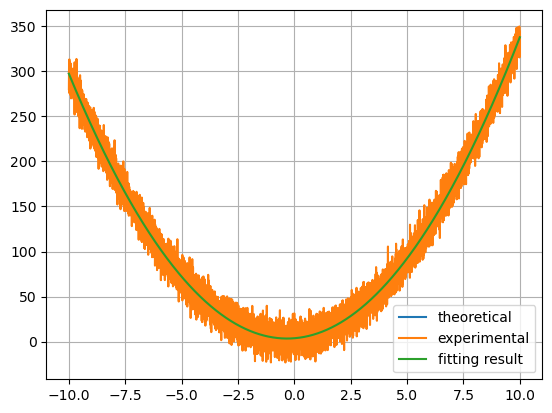

In [48]:
# Plot noisy and fitting data together
plt.plot(x, y, label='theoretical')
plt.plot(x, noisy, label='experimental')
plt.plot(x, fitting_result, label='fitting result')
plt.plot()
plt.grid()
plt.legend()

In [49]:
# Calc R-squared
mean = np.mean(noisy)
tss = np.sum(np.square(noisy - mean))
rss = np.sum(np.square(noisy - fitting_result))
r_squared = 1 - rss / tss

r_squared

0.9887655624325447

In [51]:
a_err = np.sqrt(covars[0][0])
b_err = np.sqrt(covars[1][1])
c_err = np.sqrt(covars[2][2])

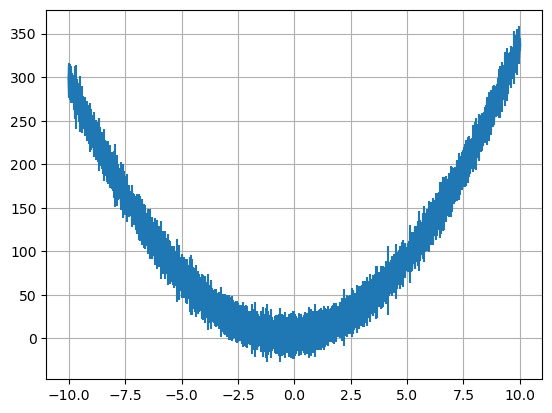

In [56]:
# difference between theoretical value and fitting result
y_err = np.fabs(fitting_result - noisy)
plt.errorbar(x, fitting_result, y_err)
plt.plot()
plt.grid()

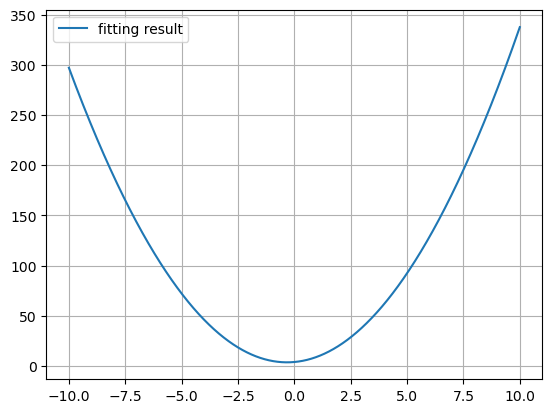

In [57]:
upper_bound = quadratic(x, params[0] + a_err, params[1] + b_err, params[2] + c_err)
lower_bound = quadratic(x, params[0] - a_err, params[1] - b_err, params[2] - c_err)

plt.plot(x, fitting_result, label='fitting result')
plt.fill_between(x, upper_bound, lower_bound)
plt.grid()
plt.legend()